<a href="https://colab.research.google.com/github/SmritiSalujaa/nyc-taxi-trip-time-prediction-project-/blob/main/Copy_of_Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ml/NYC Taxi Data.csv')
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
data.shape

(1458644, 11)

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

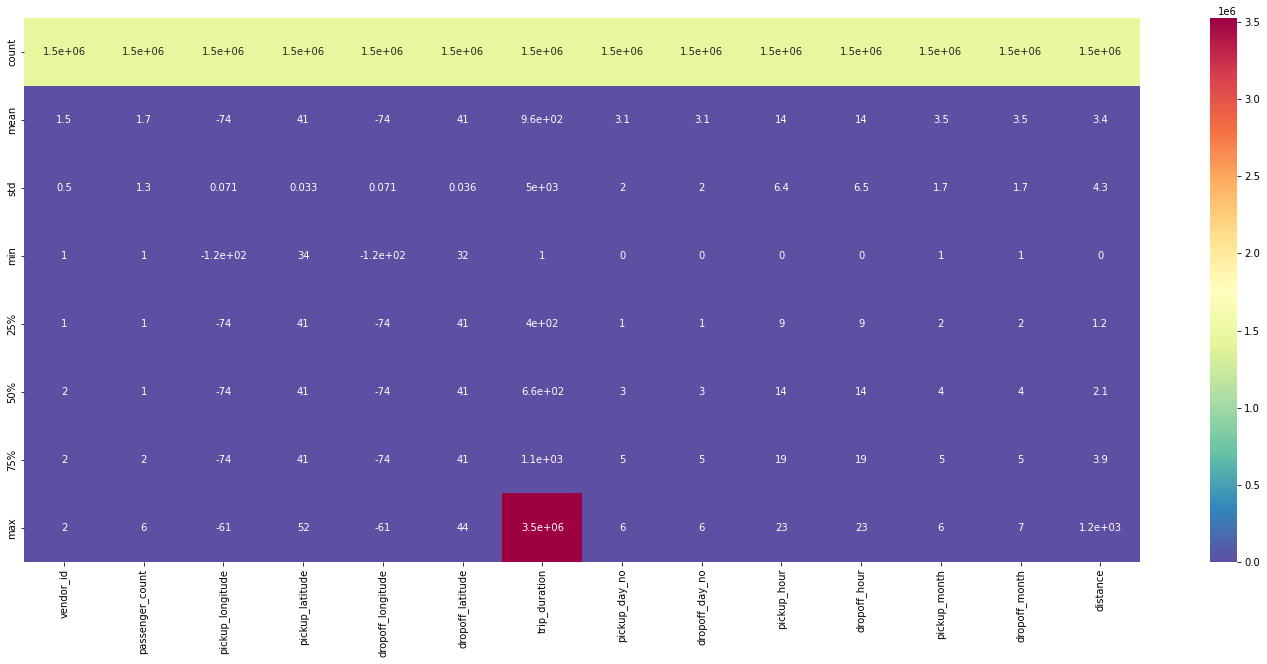

In [ ]:
plt.figure(figsize=(25,10))
x = sns.heatmap(data.describe(),annot= True,cmap = 'Spectral_r')

In [ ]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [ ]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

In [ ]:
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

In [ ]:
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

In [ ]:
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [ ]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [ ]:
from geopy.distance import great_circle

In [ ]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

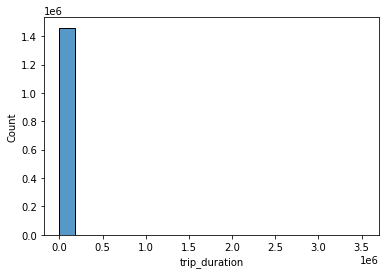

In [ ]:
sns.histplot(data['trip_duration'],kde=False,bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


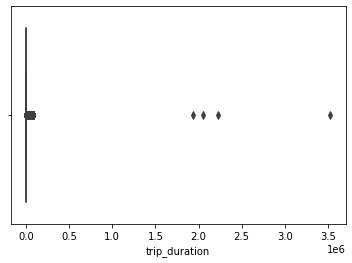

In [ ]:
sns.boxplot(data['trip_duration'])

In [ ]:
data['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

In [ ]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

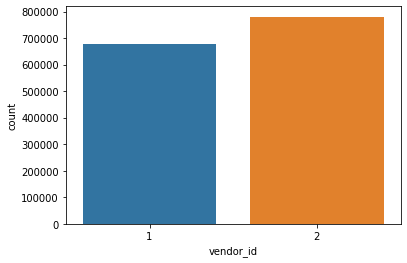

In [ ]:
sns.countplot(x='vendor_id',data=data)

In [ ]:
data.passenger_count.value_counts()


1    1033539
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

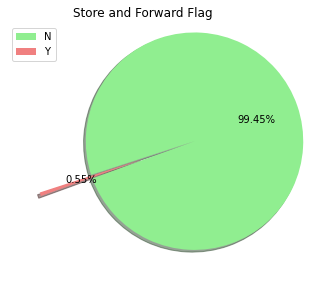

In [ ]:
plt.figure(figsize =(5,5))
plt.pie(data['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['N','Y'])
plt.title("Store and Forward Flag")

We see there are less than 1% of trips that were stored before forwarding

The number of N flag is much larger. We can later see whether they have any relation with the duration of the trip.

We will also perform Conversion of 'store_and_fwd_flag' and 'vendor_id' to be Label encoded in a while as those are Categorical features.


Target Variable - Trip duration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


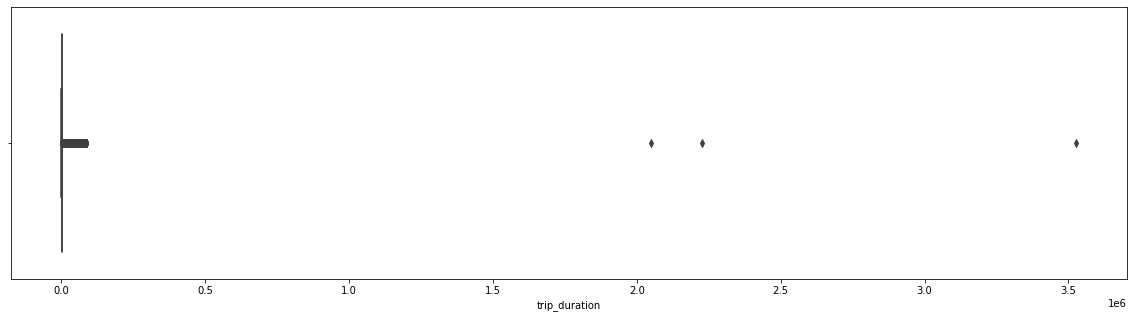

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data['trip_duration'])

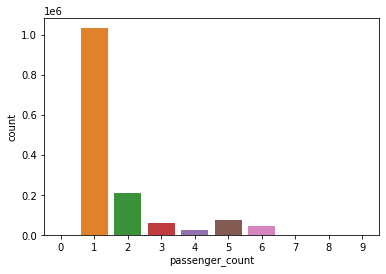

In [ ]:
sns.countplot(x='passenger_count',data=data)

In [ ]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [ ]:
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994486
Y    0.005514
Name: store_and_fwd_flag, dtype: float64

In [ ]:
data['distance'].value_counts()

0.000000    5887
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
3.134769       1
3.231345       1
1.584861       1
0.434274       1
1.134044       1
Name: distance, Length: 1452308, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Passenger Count Distribution')

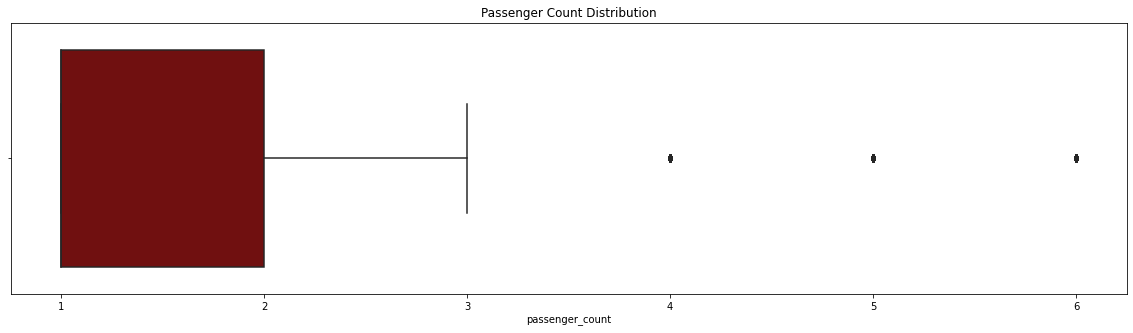

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data['passenger_count'], color='maroon')
plt.title('Passenger Count Distribution')

Distance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


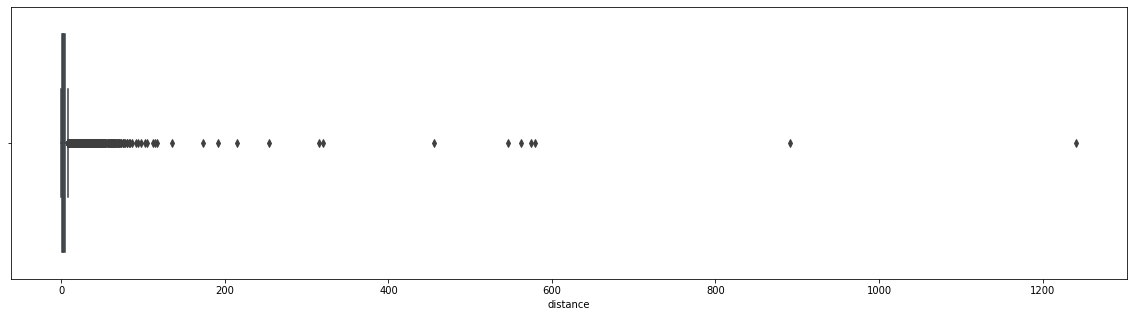

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(data.distance)
plt.show()

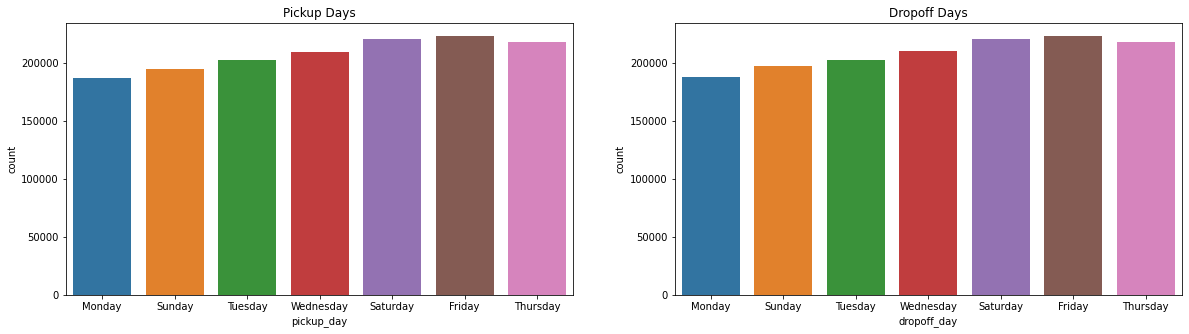

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

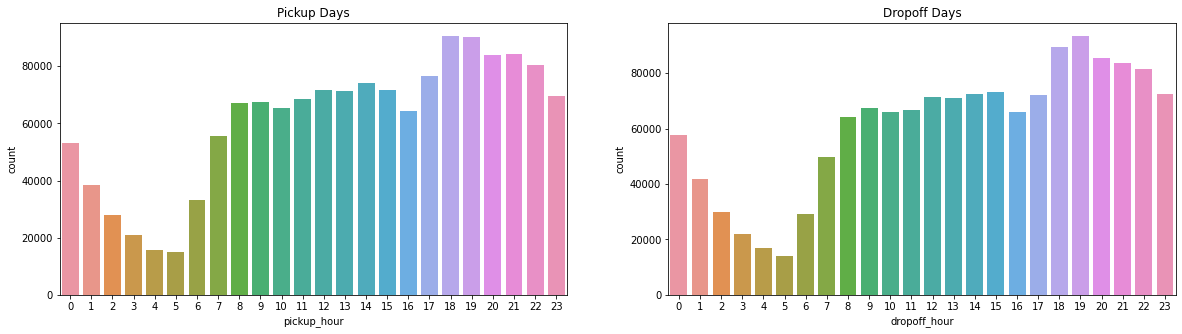

In [ ]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

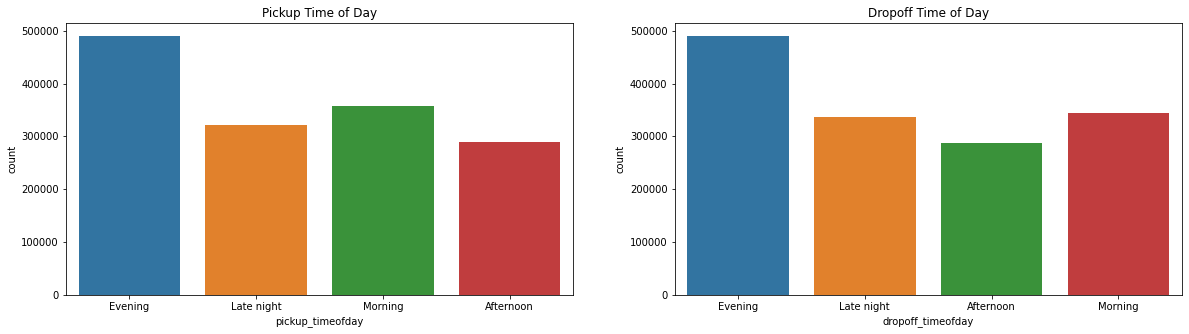

In [ ]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

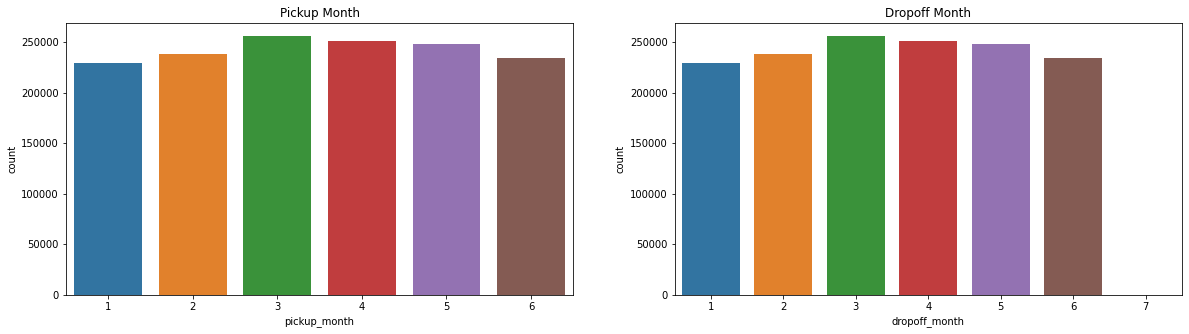

In [ ]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

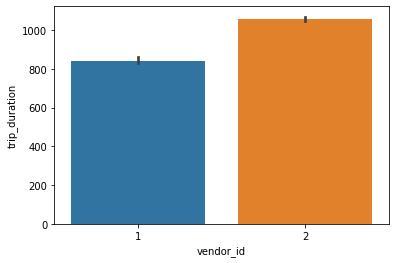

In [ ]:
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

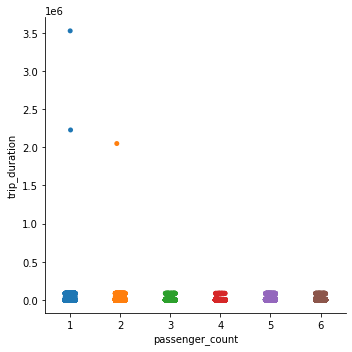

In [ ]:
sns.catplot(y='trip_duration',x='passenger_count',data=data,kind='strip')

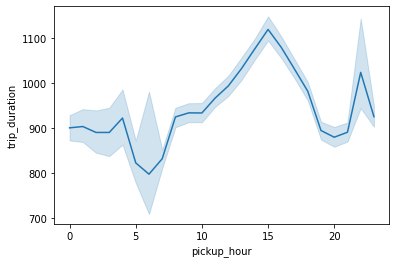

In [ ]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

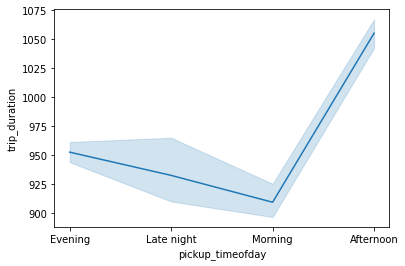

In [ ]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

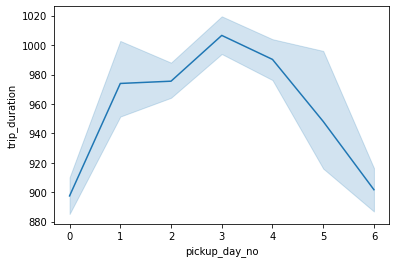

In [ ]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)

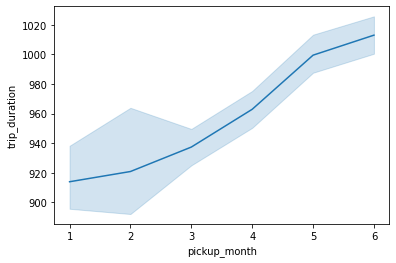

In [ ]:
sns.lineplot(x='pickup_month',y='trip_duration',data=data)

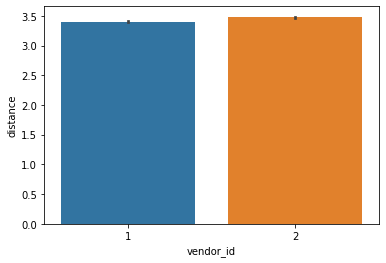

In [ ]:
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)


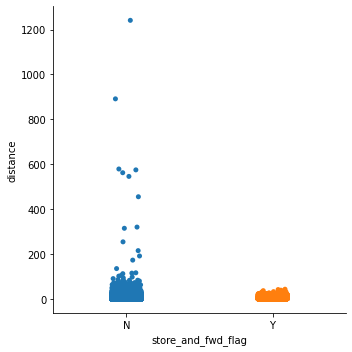

In [ ]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=data,kind='strip')

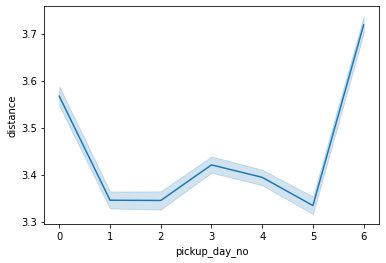

In [ ]:
sns.lineplot(x='pickup_day_no',y='distance',data=data)

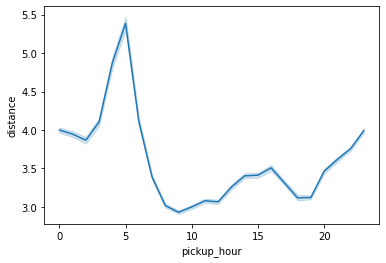

In [ ]:
sns.lineplot(x='pickup_hour',y='distance',data=data)

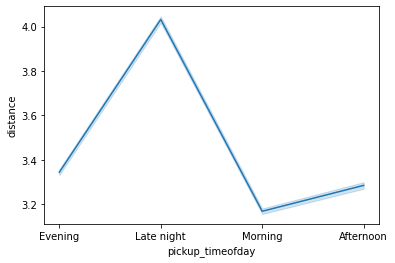

In [ ]:
sns.lineplot(x='pickup_timeofday',y='distance',data=data)

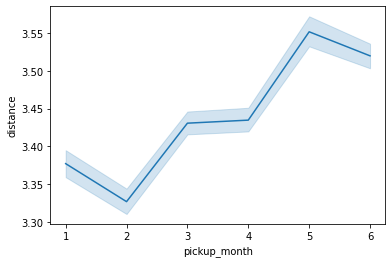

In [ ]:
sns.lineplot(x='pickup_month',y='distance',data=data)

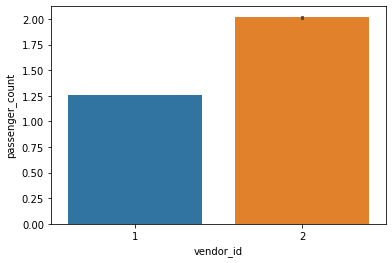

In [ ]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)

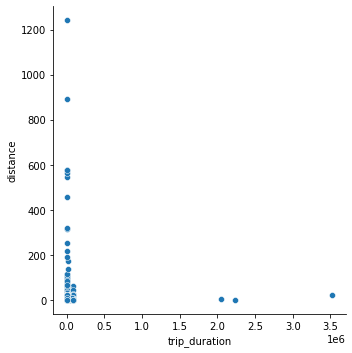

In [ ]:
sns.relplot(y=data.distance,x='trip_duration',data=data)

Trips per Day in a week

Text(0, 0.5, 'Counts')

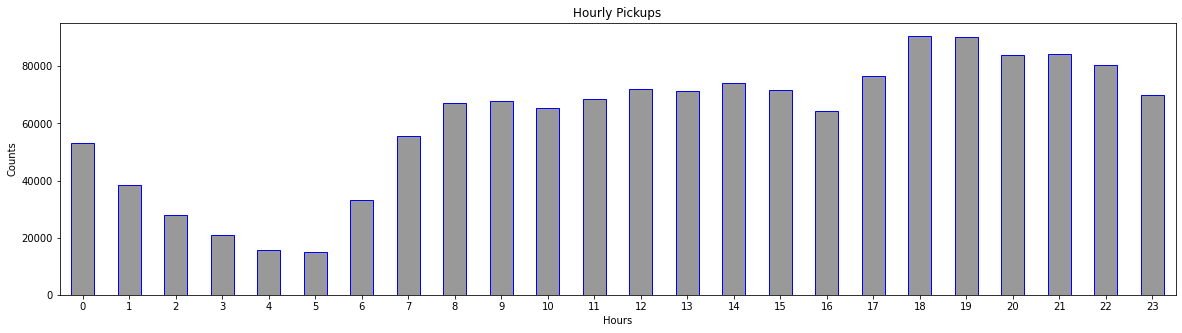

In [ ]:
#Analyzing hourly pickups

plt.figure(figsize=(20,5))
pickup_hour = data['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar',edgecolor='blue',color = '0.6')
plt.xticks(rotation=0)

plt.title("Hourly Pickups")
plt.xlabel('Hours')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

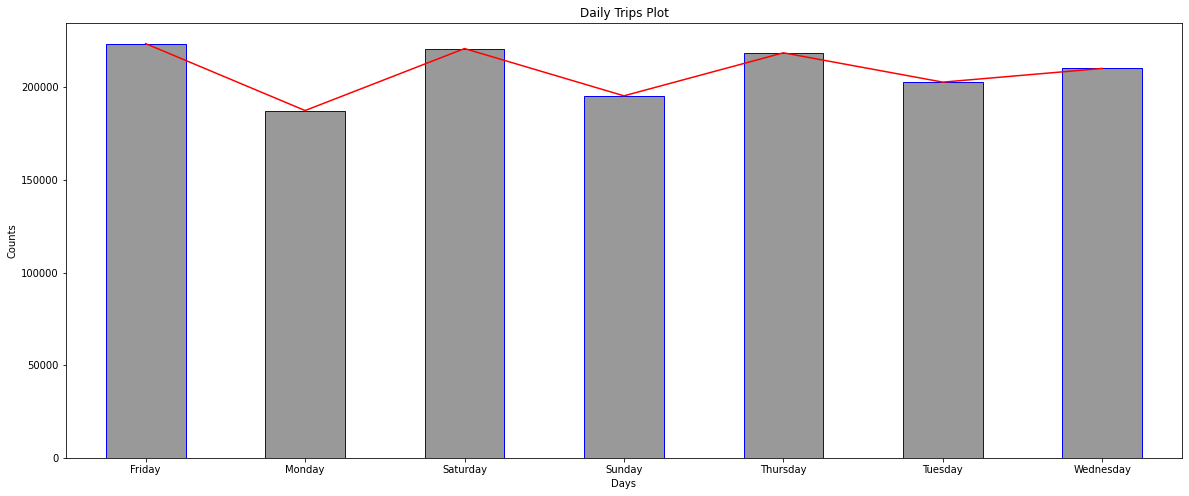

In [ ]:
#Analyzing Daily trip

plt.figure(figsize=(20,8))
pickup_day = data['pickup_day'].value_counts()
pickup_day.sort_index().plot(kind='line',color = 'red')
pickup_day.sort_index().plot(kind='bar',edgecolor='blue',color = '0.6')
plt.xticks(rotation=0)



plt.title('Daily Trips Plot')
plt.xlabel('Days')
plt.ylabel('Counts')

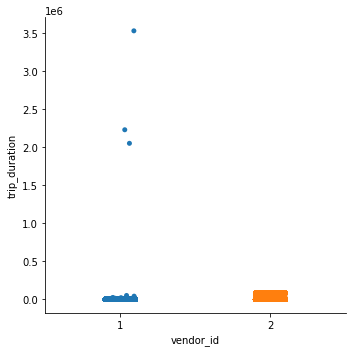

In [ ]:
# Trip Duration per Vendor estimator=np.mean
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=data)

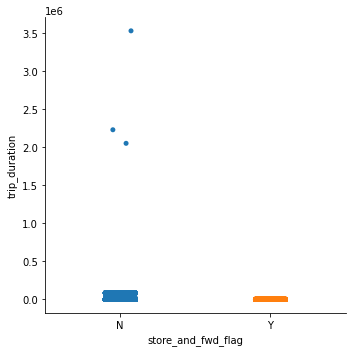

In [ ]:
# Trip Duration per Store and Forward Flag
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data,kind='strip')

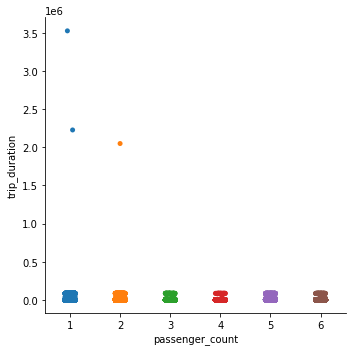

In [ ]:
# Trip Duration per hour
sns.catplot(y='trip_duration',x='passenger_count',data=data,kind='strip')

In [ ]:
nyc_taxi_df = data.drop(['id','pickup_datetime','dropoff_datetime','distance'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,17,17,3,3,Evening,Evening
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6,Late night,Late night
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12,1,1,Morning,Afternoon
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,2,19,19,4,4,Evening,Evening
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,5,13,13,3,3,Afternoon,Afternoon


In [ ]:
nyc_taxi_df.shape

(1458578, 18)

Normalization

In [ ]:
X = nyc_taxi_df.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df['trip_duration'])

In [ ]:
from sklearn.preprocessing import StandardScaler
cols = X.columns
print(cols)

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_day', 'dropoff_day', 'pickup_day_no', 'dropoff_day_no',
       'pickup_hour', 'dropoff_hour', 'pickup_month', 'dropoff_month',
       'pickup_timeofday', 'dropoff_timeofday'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
print(scaler)

StandardScaler()


In [ ]:
new_df = scaler.fit_transform(X)
new_df.shape

ValueError: ignored

In [ ]:
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

NameError: ignored